In [67]:
import numpy as np

In [68]:
# https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html

In [69]:
class Linear:
    def __init__(self, num_in, num_out, use_bias = True) -> None:
        self.use_bias = use_bias
        self.num_in = num_in
        self.num_out = num_out
        self.matr = np.random.normal(0, 1., (num_in + (1 if use_bias else 0), num_out))
        self.grads = np.zeros_like(self.matr)
        self.last_xs = None

    def get_grad(self, upstream_resp_loss: np.ndarray) -> np.ndarray:
        # divvy up the blame!
        # except now, just do it with the last inputs

        # the loss 'attributed' that we will pass up, (the loss 'attributed' to inputs) is proportonial to the weight mat
        if not self.use_bias:
            dloss_din = upstream_resp_loss @ self.matr.T
        else:
            # chop off the bias!
            dloss_din = upstream_resp_loss @ self.matr[:-1, :].T

        # the loss 'attributed' to the weights is directly proportional to the inputs we recieved
        dloss_dweights = self.last_xs.T @ upstream_resp_loss

        assert self.grads.shape == dloss_dweights.shape
        self.grads = dloss_dweights

        return dloss_din

    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        # fix xs, if we need bias
        fixed_xs = xs
        if self.use_bias:
            fixed_xs = np.hstack((fixed_xs, np.ones((fixed_xs.shape[0], 1))))
        
        if not no_record:
            self.last_xs = fixed_xs
        
        return fixed_xs @ self.matr

In [70]:
class LinearPercepFused(Linear):
    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        outp = super().forward(xs, no_record)
        return np.where(outp > 0., 1., 0.)

In [71]:
class MSELoss:
    def __init__(self) -> None:
        self.last_diffs = None

    def get_grad(self) -> np.ndarray:
        return 2.*self.last_diffs/len(self.last_diffs)

    def forward(self, y: np.ndarray, y_exp) -> np.ndarray:
        self.last_diffs = y - y_exp
        return np.mean(self.last_diffs**2)

In [72]:
# xs = np.linspace(-10, 10, 1000)
# ys = xs*10 + 2
# xs += np.random.normal(0.,.1, len(xs))

# xs = xs.reshape(-1, 1)
# ys = ys.reshape(-1, 1)

xs = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
# ys = np.array([[0.], [1.], [1.], [0.]])
ys = np.array([[0.], [0.], [1.], [0.]])


In [73]:
xs_repeat = xs.repeat(10, 0)
ys_repeat = ys.repeat(10, 0)
ys_repeat += np.random.normal(0, .01, size=ys_repeat.shape)

In [74]:
import matplotlib.pyplot as plt

In [75]:
LR = .01

In [76]:
from tqdm import tqdm

In [77]:
def get_random_range(lenx, seq_len):
    start_i = np.random.randint(0, lenx-seq_len)
    return start_i, start_i + seq_len

In [78]:
def shuffle(arrs):
    for arr in arrs:
        assert len(arr) == len(arrs[0]), "All arrays should be the same length"
    idxs = np.arange(0, len(arr))
    np.random.shuffle(idxs)
    reindexed = [arr[idxs] for arr in arrs]
    return reindexed

In [79]:
get_random_range(len(xs_repeat), 10)

(14, 24)

In [80]:
xs_repeat_shuff, ys_repeat_shuff = shuffle([xs_repeat, ys_repeat])

  5%|▍         | 136/3000 [00:00<00:02, 1347.49it/s]

loss=0.9774939498353618
loss=0.0001613546125106713
loss=1.000189318643374
loss=0.00012546701625092095
loss=0.0002758064768827295
loss=0.0004403880892311441
loss=1.4352036915794855e-06
loss=0.0001584675390556158
loss=0.0001613546125106713
loss=1.7478479154176206e-06
loss=0.0001584675390556158
loss=0.9633117009907038
loss=0.9895354930815231
loss=0.0002121646716167048
loss=1.4352036915794855e-06
loss=7.105599527717821e-05
loss=0.0004403880892311441
loss=0.00012546701625092095
loss=0.9828585781152648
loss=1.0266102947277465
loss=0.0001613546125106713
loss=0.0002758064768827295
loss=0.0001535094905781837
loss=7.1275197781627696e-06
loss=1.4352036915794855e-06
loss=0.9774939498353618
loss=0.0009197973335568791
loss=0.0002758064768827295
loss=1.000189318643374
loss=5.338529669765255e-05
loss=7.1275197781627696e-06
loss=1.7478479154176206e-06
loss=1.000189318643374
loss=0.00012546701625092095
loss=0.9828585781152648
loss=4.295320332694952e-06
loss=1.0018979877152059
loss=1.000189318643374
loss

 27%|██▋       | 810/3000 [00:00<00:00, 2810.58it/s]


loss=4.32788547016072e-05
loss=0.00012546701625092095
loss=0.0009197973335568791
loss=1.7478479154176206e-06
loss=0.00014997802188013008
loss=0.00017471003451821114
loss=1.7478479154176206e-06
loss=0.00014997802188013008
loss=0.0001613546125106713
loss=5.338529669765255e-05
loss=0.0002758064768827295
loss=0.00014997802188013008
loss=4.2846034811249765e-05
loss=0.00017471003451821114
loss=0.00037465101529185447
loss=0.0001943223172713378
loss=0.0002758064768827295
loss=0.00017471003451821114
loss=8.885867984426545e-05
loss=4.2846034811249765e-05
loss=0.0003428260558985224
loss=0.00014997802188013008
loss=2.7290787038015483e-06
loss=0.0009197973335568791
loss=0.0004403880892311441
loss=0.0001584675390556158
loss=0.0001584675390556158
loss=0.0003428260558985224
loss=4.50929952508092e-08
loss=0.00017471003451821114
loss=8.997357004960615e-07
loss=8.885867984426545e-05
loss=7.409349242531227e-05
loss=0.0001613546125106713
loss=1.7478479154176206e-06
loss=1.7478479154176206e-06
loss=7.10559

 46%|████▋     | 1389/3000 [00:00<00:00, 2812.07it/s]


loss=0.0001535094905781837
loss=0.0004403880892311441
loss=0.00012552519486765018
loss=0.00014861484203773528
loss=0.00012807591585693823
loss=3.2590906523566165e-07
loss=0.00012807591585693823
loss=0.0002121646716167048
loss=1.6651341314791e-07
loss=0.0001943223172713378
loss=0.0001535094905781837
loss=8.885867984426545e-05
loss=2.7290787038015483e-06
loss=0.0002121646716167048
loss=3.5040664889952095e-06
loss=0.00012546701625092095
loss=0.00014997802188013008
loss=0.0001584675390556158
loss=0.0002758064768827295
loss=3.5040664889952095e-06
loss=0.00014861484203773528
loss=3.5040664889952095e-06
loss=2.9921414962075983e-06
loss=5.338529669765255e-05
loss=4.32788547016072e-05
loss=7.1275197781627696e-06
loss=7.105599527717821e-05
loss=3.2590906523566165e-07
loss=3.2590906523566165e-07
loss=0.0002121646716167048
loss=4.50929952508092e-08
loss=8.997357004960615e-07
loss=0.00012546701625092095
loss=4.2846034811249765e-05
loss=4.32788547016072e-05
loss=6.163773553465986e-09
loss=1.4352036

 68%|██████▊   | 2049/3000 [00:00<00:00, 3052.72it/s]


loss=0.0009197973335568791
loss=0.0002758064768827295
loss=7.105599527717821e-05
loss=7.105599527717821e-05
loss=1.6651341314791e-07
loss=8.885867984426545e-05
loss=0.0001613546125106713
loss=0.0001613546125106713
loss=0.00014861484203773528
loss=7.1275197781627696e-06
loss=3.2590906523566165e-07
loss=4.295320332694952e-06
loss=0.00012552519486765018
loss=4.2846034811249765e-05
loss=2.7290787038015483e-06
loss=0.0001584675390556158
loss=0.00012807591585693823
loss=0.0001613546125106713
loss=8.959539098407317e-09
loss=6.163773553465986e-09
loss=8.885867984426545e-05
loss=4.2846034811249765e-05
loss=0.0009197973335568791
loss=2.75206606804496e-05
loss=5.338529669765255e-05
loss=7.1275197781627696e-06
loss=0.0001943223172713378
loss=0.0001943223172713378
loss=4.50929952508092e-08
loss=1.4352036915794855e-06
loss=2.7290787038015483e-06
loss=0.0001584675390556158
loss=4.341464675972208e-05
loss=4.295320332694952e-06
loss=7.1275197781627696e-06
loss=0.00037465101529185447
loss=0.00027580647

 78%|███████▊  | 2355/3000 [00:00<00:00, 2827.22it/s]


loss=3.5040664889952095e-06
loss=1.4297670935486537e-06
loss=0.00037465101529185447
loss=0.00012552519486765018
loss=0.0009197973335568791
loss=5.338529669765255e-05
loss=0.0001584675390556158
loss=1.6651341314791e-07
loss=2.7290787038015483e-06
loss=3.2590906523566165e-07
loss=0.00017471003451821114
loss=0.0004403880892311441
loss=0.0002758064768827295
loss=0.00012546701625092095
loss=7.409349242531227e-05
loss=8.997357004960615e-07
loss=0.00017471003451821114
loss=5.338529669765255e-05
loss=0.0001584675390556158
loss=0.0003428260558985224
loss=0.0001535094905781837
loss=0.00012546701625092095
loss=0.0001943223172713378
loss=8.885867984426545e-05
loss=0.0001535094905781837
loss=0.0001943223172713378
loss=4.50929952508092e-08
loss=2.75206606804496e-05
loss=6.163773553465986e-09
loss=0.00014861484203773528
loss=0.00014997802188013008
loss=8.885867984426545e-05
loss=0.00012546701625092095
loss=4.32788547016072e-05
loss=0.0001613546125106713
loss=4.295320332694952e-06
loss=0.000125525194

 97%|█████████▋| 2896/3000 [00:01<00:00, 2428.33it/s]


loss=0.0009197973335568791
loss=0.0009197973335568791
loss=3.2590906523566165e-07
loss=8.885867984426545e-05
loss=1.4352036915794855e-06
loss=8.959539098407317e-09
loss=0.00012552519486765018
loss=0.0004403880892311441
loss=3.5040664889952095e-06
loss=0.0003428260558985224
loss=5.338529669765255e-05
loss=4.50929952508092e-08
loss=0.00012807591585693823
loss=2.9921414962075983e-06
loss=1.4297670935486537e-06
loss=0.0002758064768827295
loss=6.163773553465986e-09
loss=0.0009197973335568791
loss=8.997357004960615e-07
loss=0.0002758064768827295
loss=0.0001943223172713378
loss=4.50929952508092e-08
loss=0.00012546701625092095
loss=0.0004403880892311441
loss=8.959539098407317e-09
loss=0.00014861484203773528
loss=0.0001584675390556158
loss=0.0001535094905781837
loss=5.338529669765255e-05
loss=0.00014861484203773528
loss=4.2846034811249765e-05
loss=3.2590906523566165e-07
loss=4.341464675972208e-05
loss=3.5040664889952095e-06
loss=7.1275197781627696e-06
loss=0.00012546701625092095
loss=4.5092995

100%|██████████| 3000/3000 [00:01<00:00, 2665.34it/s]


loss=0.00017471003451821114
loss=4.50929952508092e-08
loss=6.163773553465986e-09
loss=0.00014861484203773528
loss=8.959539098407317e-09
loss=2.9921414962075983e-06
loss=4.50929952508092e-08
loss=0.00012552519486765018
loss=7.409349242531227e-05
loss=3.5040664889952095e-06


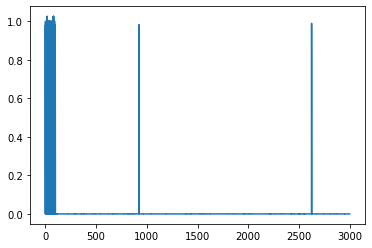

In [81]:
lin1 = LinearPercepFused(2, 5, use_bias=True)
lin2 = LinearPercepFused(5, 1, use_bias=True)
lossf = MSELoss()

losses = []
for _ in tqdm(range(3000)):
    starti, endi = get_random_range(len(xs_repeat_shuff), 1)
    out_l1 = lin1.forward(xs_repeat_shuff[starti:endi])
    out = lin2.forward(out_l1)

    loss = lossf.forward(out, ys_repeat_shuff[starti:endi])
    print(f"{loss=}")
    
    pass_back_grad = lossf.get_grad()
    pass_back_grad = lin2.get_grad(pass_back_grad)
    pass_back_grad = lin1.get_grad(pass_back_grad)

    lin1.matr += lin1.grads*-LR
    lin2.matr += lin2.grads*-LR
    losses.append(loss)
import matplotlib.pyplot as plt
plt.plot(losses)

In [82]:
out_l1 = lin1.forward(xs, True)
out = lin2.forward(out_l1, True)
out

array([[0.],
       [0.],
       [1.],
       [0.]])

In [83]:
sxs, sys = np.meshgrid(*[np.linspace(-2, 2, 202) for _ in range(2)])

In [84]:
pts = np.vstack([sxs.ravel(), sys.ravel()]).T

In [85]:
import matplotlib.pyplot as plt

In [86]:
out_l1 = lin1.forward(pts, True)
out = lin2.forward(out_l1, True)
out

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [87]:
print(f"{out.min()=}, {out.max()=}")

out.min()=0.0, out.max()=1.0


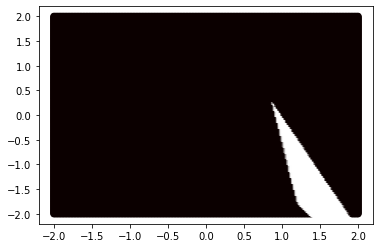

In [88]:
plt.scatter(pts[:, 0], pts[:, 1], c=out, cmap="hot")